# (Homework) Week 6 - DataScience Bootcamp Fall 2025

All solution cells are replaced with `# TODO` placeholders so you can fill them in.

**Name:** Mariia Onokhina \
**Email:** mo2851@nyu.edu

---

### Problem 1: Dataset Splitting

1. You have recordings of 44 phones from 100 people; each person records ~200 phones/day for 5 days.
   - Design a valid training/validation/test split strategy that ensures the model generalizes to **new speakers**.

**Answer:**

We can split the dataset into 3 parts:
- 70% for training (around 70 people)
- 15% for validation (15 people)
- 15% for testing (15 people)
The split should be randomized to ensure it performs accurately on test set.

2. You now receive an additional dataset of 10,000 phone recordings from **Kilian**, a single speaker.
   - You must train a model that performs well **specifically for Kilian**, while also maintaining generalization.

**Answer:**

We split the model into 2 parts. The base model stays the same as the previous answer. For Kilian, we treat her like the target speaker and split the dataset with 10000 samples into 80% for training, 10% for validation, and 10% for testing.

We will train only on the 70 general speakers excluding Kilian. Then, add another layer/pipeline using Kilian's data. Then, evaluate on both general test set and Kilian test set.

*Describe your proposed split strategy and reasoning.* (Theory)

### Problem 2: K-Nearest Neighbors

1. **1-NN Classification:** Given dataset:

   Positive: (1,2), (1,4), (5,4)

   Negative: (3,1), (3,2)

   Plot the 1-NN decision boundary and classify new points visually.


In [4]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

In [3]:
X = np.array([
    [1, 2], [1, 4], [5, 4],
    [3, 1], [3, 2]
])
y = np.array([1, 1, 1, -1, -1])   # 1 for positive, -1 for negative


In [8]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X, y)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


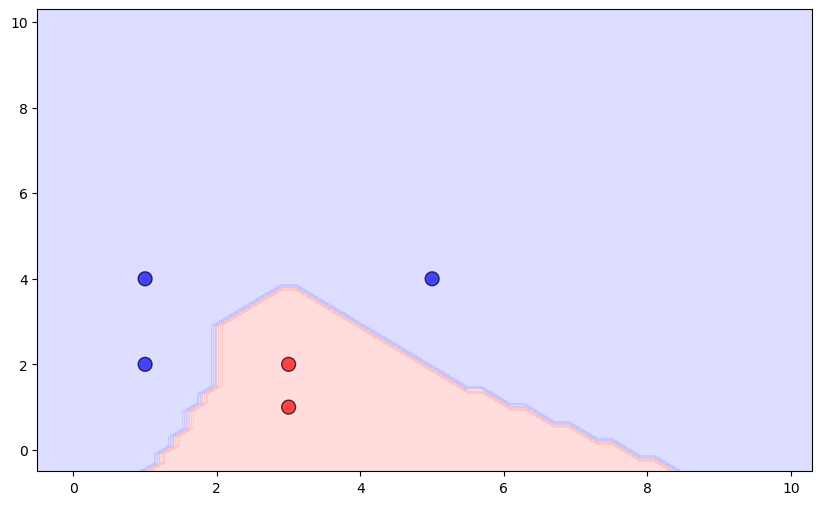

In [10]:
h = 0.2
x_min, x_max = -0.5, 10.5
y_min, y_max = -0.5, 10.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

# Predict on mesh
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,6))
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
               s=100, edgecolor='black', alpha=0.7)

2. **Feature Scaling:** Consider dataset:

   Positive: (100,2), (100,4), (500,4)

   Negative: (300,1), (300,2)

   What would the 1-NN classify point (500,1) as **before and after scaling** to [0,1] per feature?

**Before scaling:**

Compute Euclidean distances from (500,1) to

1. (100,2): d = sqrt((500-100)^2 + (1-2)^2) = 400.001
2. (100,4): d = sqrt(400^2 + 3^2) = 400.011
3. (500,4): d = sqrt(0 + 3^2) = 3
4. (300,1): d = sqrt(200^2 + 0) = 200
5. (300,2): d = sqrt(200^2 + 1^2) = 200.003
The closest point is (500,4) which is Positive

**Scale each feature:**

x_min = 100

x_max = 500

y_min = 1

y_max = 4

x' = (x - x_min) / (x_max - x_min)

(100,2) -> (0, (2-1)/3) = (0, 0.333)

(100,4) -> (0, 1)

(500, 4) -> (1, 1)

(300, 1) -> (0.5, 0)

(300, 2) -> (0.5, 0.333)

(500, 1) -> (1, 0)

After scaling, the closest point is (300,1) which is Negative

3. **Handling Missing Values:** How can you modify K-NN to handle missing features in a test point?

We can either ignore missing values or modify KNN so that the distance between test and training points is only computed over the features that are present in the test point.

4. **High-dimensional Data:** Why can K-NN still work well for images even with thousands of pixels?

KNN works well for images because the pixels are close together and similar images are near each other in terms of pixels. Also, pixels next to each other are very related. 

### Problem 3: Part 1

You are given a fully trained Perceptron model with weight vector **w**, along with training set **D_TR** and test set **D_TE**.

1. Your co-worker suggests evaluating $h(x) = sign(w \cdot x)$ for every $(x, y)$ in D_TR and D_TE. Does this help determine whether test error is higher than training error?


**Answer:**
Yes, you can run the perceptron on every point in the training set and every point in the test set and count how many mistakes it makes to help determine whether test error is higher than training error. However, the training error should be 0, so evaluating it doesn't add new info.


2. Why is there no need to compute training error explicitly for the Perceptron algorithm?

**Answer:**

Because the Perceptron only stops when it makes no mistakes on the training set. So once it finishes training, the training error is already zero by definition.

### Problem 3: Two-point 2D Dataset (Part 2)

Run the Perceptron algorithm **by hand or in code** on the following data:

1. Positive class: (10, -2)
2. Negative class: (12, 2)

Start with $w_0 = (0, 0)$ and a learning rate of 1.

- Compute how many updates are required until convergence.
- Write down the sequence of $w_i$ vectors.

Check (10, -2)

w0 * x = 0 *10 + 0(-2) = 0

sign(0) = 0 (wrong because it should be + 1)

Update by adding the point

w = (0, 0) + (10, -2) = (10, -2)

Check (12, 2)

w * x = 10 * 12 + (-2) * 2 = 120 - 4 = 116

sign(116) =  +1 (wrong because true label is -1)

Update by subtracting the point

w = (10, -2) - (12, 2) = (-2, -4)

Check (10, -2)

w * x = -12

sign(-12) = -1 (wrong again)

Add the point: w = (8, -6)

Check (12, 2)

w * x = 84

sign(84) = +1 (wrong)

Subtract the point: w = (-4, -8)

...

It doesn't seem like the perceptron will converge. I'm not sure

### Problem 4: Reconstructing the Weight Vector

Given the log of Perceptron updates:

| x | y | count |
|---|---|--------|
| (0, 0, 0, 0, 4) | +1 | 2 |
| (0, 0, 6, 5, 0) | +1 | 1 |
| (3, 0, 0, 0, 0) | -1 | 1 |
| (0, 9, 3, 6, 0) | -1 | 1 |
| (0, 1, 0, 2, 5) | -1 | 1 |

Assume learning rate = 1 and initial weight $w_0 = (0, 0, 0, 0, 0)$.

Compute the final weight vector after all updates.

w = w + count * learning_rate * y * x

1. x = (0, 0, 0, 0, 4), y=+1 \
   w = 2 * (+1)*(0, 0, 0, 0, 4) = (0,0,0,0,8) \
   w1 = (0,0,0,0,8)
2. x = (0, 0, 6, 5, 0), y=+1 \
   w = (0, 0, 6, 5, 0) \
   w2 = 0, 0, 6, 5, 8)
4. x = (3, 0, 0, 0, 0), y=-1  \
   w = -1 * (3, 0, 0, 0, 0) = (-3, 0, 0, 0, 0) \
   w3 = (-3, 0, 6,5,8)
5. x=(0,9,3,6,0),y=−1 \
   w = -1 * (0,9,3,60) = (0,-9, -3, -6,0) \
   w4 = (−3,−9,3,−1,8)
6. x=(0,1,0,2,5),y=−1 \
   w = -1 * (0,1,0,2,5) = (0,-1,0,-2,-5) \
   w5 = (-3, -10, 3, -3, 3)
   
Final vector: w = (-3, -10, 3, -3, 3)

### Problem 5: Visualizing Perceptron Convergence

Implement a Perceptron on a small 2D dataset with positive and negative examples.

- Plot the data points.
- After each update, visualize the decision boundary.
- Show how it converges to a stable separator.

In [16]:
X_pos = np.array([
    [2, 4],
    [4, 5],
])

# Negatives (-1)
X_neg = np.array([
    [1, 1],
    [3, 1],
    [5, 2],
])

X = np.vstack([X_pos, X_neg])
y = np.array([+1, +1, -1, -1, -1])

w = np.zeros(2)   # weights
b = 0.0           # bias
eta = 1.0         # learning rate

history = [] 

for epoch in range(20): 
    errors = 0
    for xi, yi in zip(X, y):
        if yi * (np.dot(w, xi) + b) <= 0:
            # misclassified -> update
            w = w + eta * yi * xi
            b = b + eta * yi
            history.append((w.copy(), b))
            errors += 1
    if errors == 0:
        break

print("Final w:", w, "Final b:", b)
print("Number of updates:", len(history))

Final w: [-2.  2.] Final b: -1.0
Number of updates: 3


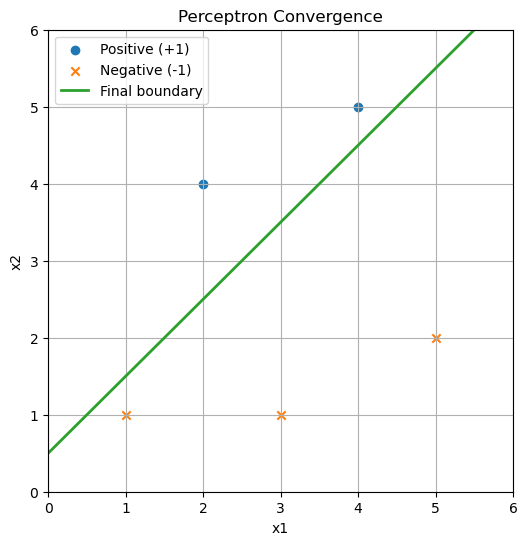

In [17]:
fig, ax = plt.subplots(figsize=(6, 6))

# plot points
ax.scatter(X_pos[:, 0], X_pos[:, 1], marker='o', label='Positive (+1)')
ax.scatter(X_neg[:, 0], X_neg[:, 1], marker='x', label='Negative (-1)')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x_vals = np.linspace(x_min, x_max, 100)

for i, (w_i, b_i) in enumerate(history):
    if w_i[1] == 0:
        continue  # avoid division by zero
    y_vals = -(w_i[0] * x_vals + b_i) / w_i[1]
    if i == len(history) - 1:
        ax.plot(x_vals, y_vals, linewidth=2, label='Final boundary')
    else:
        ax.plot(x_vals, y_vals, linewidth=1, alpha=0.3)

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Perceptron Convergence")
ax.legend()
ax.set_xlim(x_min, x_max)
ax.set_ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
ax.grid(True)

plt.show()